In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from src.features.clean import clean_json
from src.data.scrape import scrape_multiple_years
import os

import src.visualization.simple_visualization as sv

$$ \textbf{Préparation des données} $$

$\textbf{Définition de input\_ path et ouput\_ path pour les saisons de 2018 à 2020}$

In [4]:
# Saison 2018/2019
input_path_2018 = os.path.join('../data/datasets/json_files/','2018.json')
output_path_2018 = os.path.join('../data/datasets/csv_files/','2018.csv')
# Saison 2019/2020
input_path_2019 = os.path.join('../data/datasets/json_files/','2019.json')
output_path_2019 = os.path.join('../data/datasets/csv_files/','2019.csv')
# Saison 2020/2021
input_path_2020 = os.path.join('../data/datasets/json_files/','2020.json')
output_path_2020 = os.path.join('../data/datasets/csv_files/','2020.csv')

$\textbf{Récupération des DataFrames nettoyés}$

In [5]:
# Saison 2018/2019
df_1 = clean_json(input_path_2018, output_path_2018)
# Saison 2019/2020
df_2 = clean_json(input_path_2019, output_path_2019)
# Saison 2020/2021
#df_3 = clean_json(input_path_2020, output_path_2020)

$$\textbf{QUESTION 1 :}$$
$$\text{On travaille sur les données de la saison 2018/2019}$$

In [7]:
import matplotlib.pyplot as plt

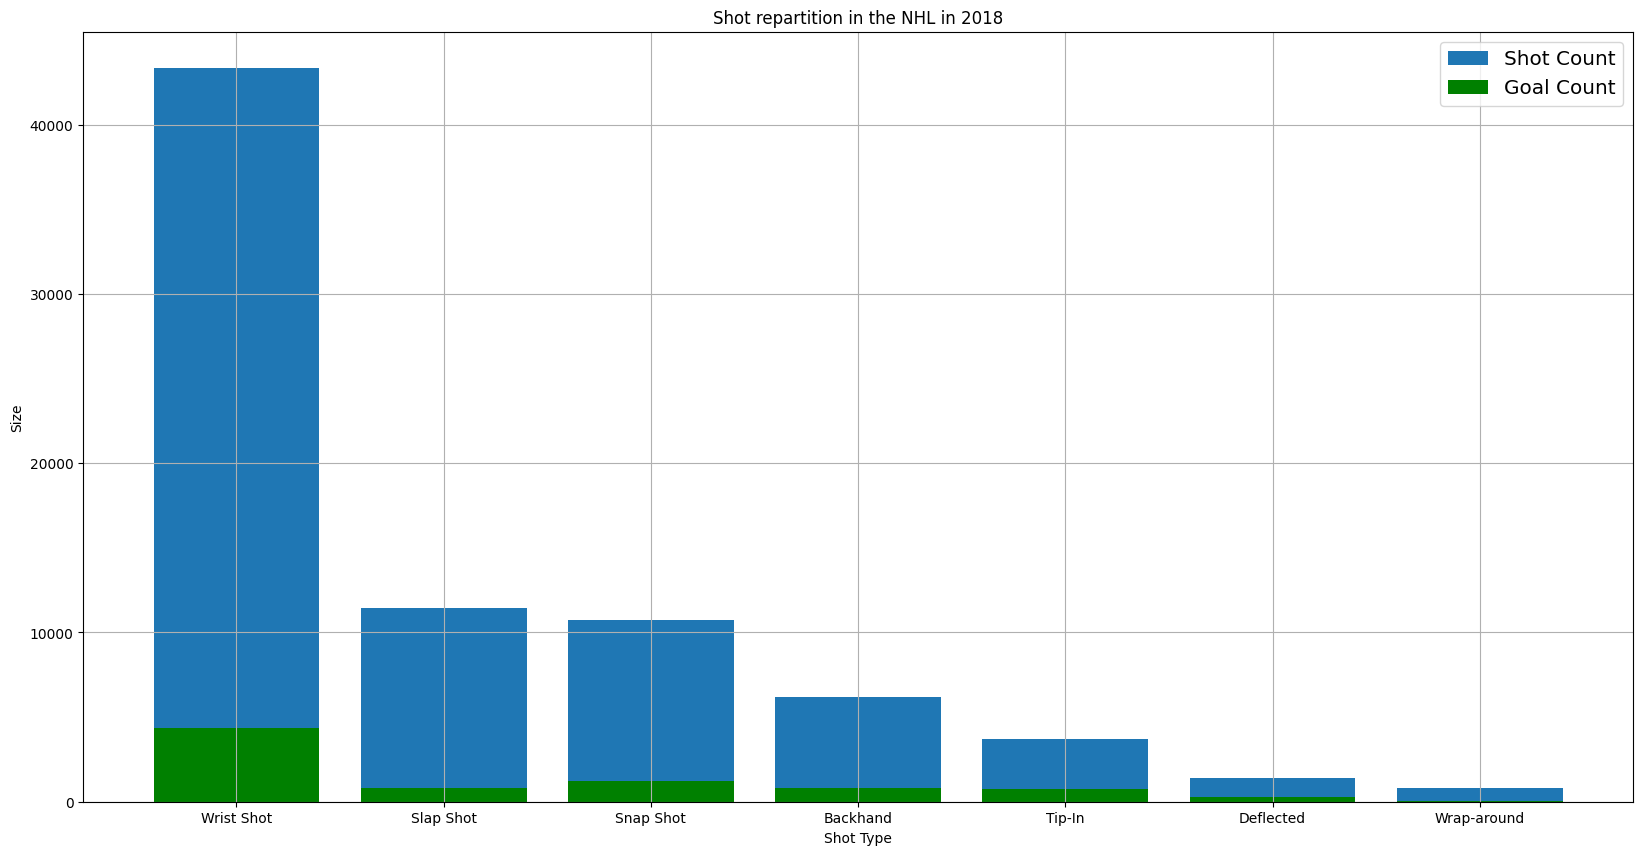

In [6]:
# Pour la saison 2018/2019
sv.plot_shot_repartition_NHL(df_1,2018)

In [9]:
# On calcule l'efficacité par type de tir 
shot_count, goal_count = sv.get_shot_repartition_NHL(df_1)

shot_count.sort_index
goal_count.sort_index

total_attempts = shot_count.values + goal_count.values

efficiency_table = pd.DataFrame(index = shot_count.index)
efficiency_table['efficiency'] = (goal_count.values/total_attempts)*100

In [10]:
efficiency_table

,efficiency
shot_type,
Wrist Shot,9.084040
Slap Shot,9.567755
Snap Shot,7.124352
Backhand,11.248384
Tip-In,17.107309
Deflected,15.723645
Wrap-around,6.764374


$ \textbf{Interprétation :} $

- Sur la saison 2018/2019, on voit que le type de tir le plus efficace est le Tip-In avec une efficacité de 17.1%; Ceci s'explique par le fait que ce tir est effectué à courte distance des cages. Il est donc plus difficile pour le gardien de but d'effectuer un arrêt à une telle distance.

- Le tir le plus courant est le 'Wrist Shot' avec plus de 47000 tirs (Shot et Goal) par saison. Ce tir est avantageux car il est rapide à effectuer, précis et potentiellement puissant. (https://fr.wikipedia.org/wiki/Tir_(hockey_sur_glace))

- Pour cette visualisation, nous avons choisi un histogramme car il est plus facile de visualiser le volume de tir pour chacun des types de tir. Nous proposons plus bas une autre forme de visualisation, sous forme de diagramme en camembert, mais celle-ci ne nous permet d'observer que la répartition des types de tirs

$$ \textbf{ADDITIONNEL :} $$
$$ \text{Création d'un outil de visualisation interactif sur la répartition des tirs pour une équipe donnée} $$

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [12]:
def plot_interactive_hist(team_name):
    sv.hist_shot_repartition_by_team(team_name, df_1, 2018)

In [13]:
team_list = df_1['attacking_team_name'].unique()
team_dropdown = widgets.Dropdown(
    options=team_list,
    description='Team:'
)

In [14]:
interactive_plot = widgets.interactive(plot_interactive_hist, team_name=team_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Team:', options=('Montréal Canadiens', 'Toronto Maple Leafs', 'Was…

$$ \textbf{Une autre forme de visualisation} $$ 
$$\text{Visualisation de la répartition des tirs sous forme d'un graphe en camembert}$$

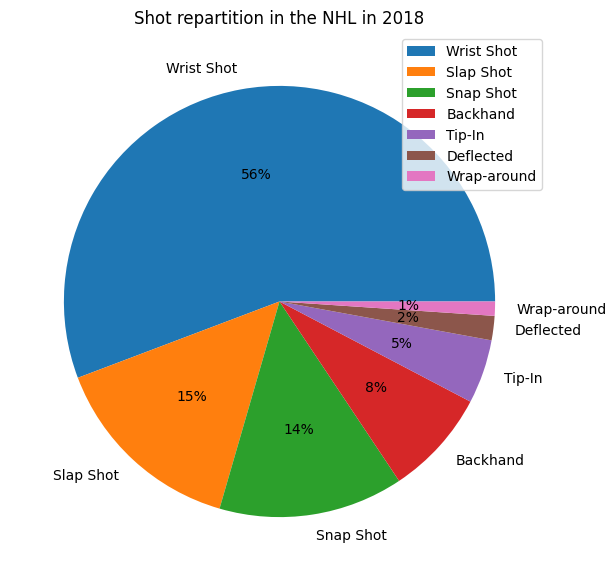

In [15]:
sv.pie_shot_repartition_NHL(df_1,2018)

- Ce graphe nous permet de voir clairement que le type de tir le plus courant est le "Wrist Shot". Mais on ne npeut pas effectuer plus de commentaires sur la dangerosité des tirs.

$$  \textbf{QUESTION 2 :} $$ 


In [16]:
# Saison 2018/2019
df_1 = sv.df_add_distance_to_net(df_1)
# Saison 2019/2020
df_2 = sv.df_add_distance_to_net(df_2)
# Saison 2020/2021
df_3 = sv.df_add_distance_to_net(df_3)

D'après le reglèment de la NHL, les joueurs n'ont pas le droit de tirer avant d'avoir passer la ligne médiane du terrain. 

La distance de tir maximale correspond aux extremités de la ligne médiane :
$$ d_{max} = \sqrt{89^{2} + 42.5^{2}} \approx 98 $$

On travaille donc avec des intervalles de 0 à 100 avec un pas de 2.5 

In [17]:
bins = np.arange(0,102.5,2.5)
bin_centers = np.arange(1.25, 100, 2.5)

$$ \textbf{Saison 2018/2019} $$

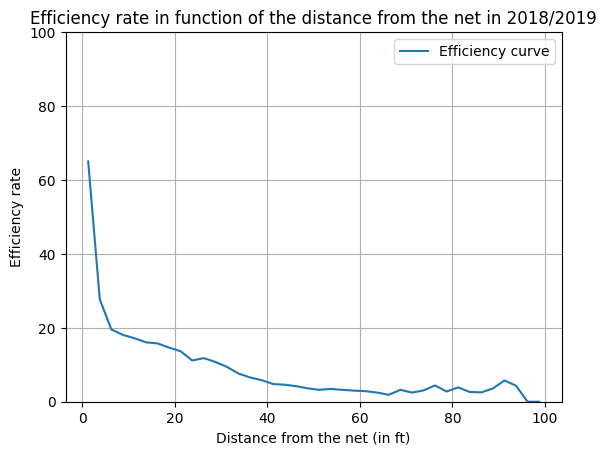

In [18]:
# Saison 2018/2019
sv.plot_efficiency_NHL(df_1, bins, bin_centers, 2018)

$$ \textbf{Saison 2019/2020} $$

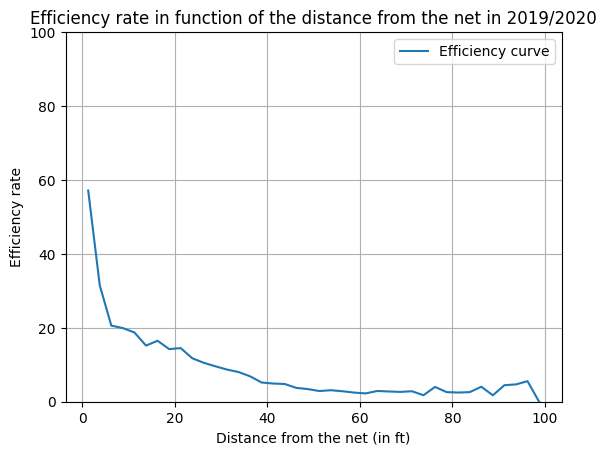

In [19]:
# Saison 2019/2020
sv.plot_efficiency_NHL(df_2, bins, bin_centers, 2019)

$$ \textbf{Saison 2020/2021} $$

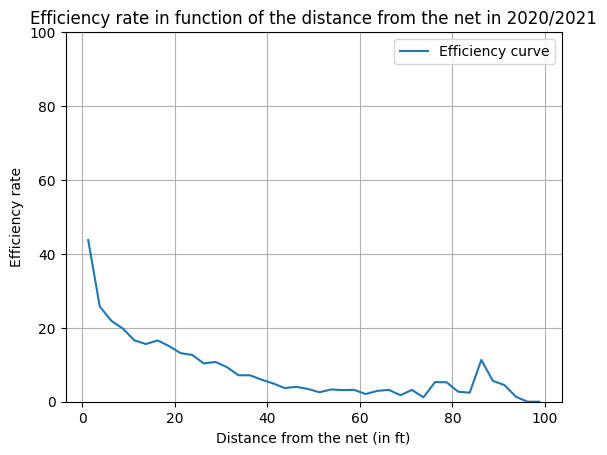

In [20]:
sv.plot_efficiency_NHL(df_3, bins, bin_centers, 2020)

$\textbf{Intérprétation : }$
- Comme on pouvait s'y attendre, on remarque que pour toutes les saisons de 2018 à 2020, l'efficacité diminue plus on s'éloigne de la cage. Celà est bien cohérent étant donné qu'il est plus facile de marquer quand on est à une distance de 5 ft qu'à 40 ft.
La décroissance de la courbe d'efficacité est plutôt regulière, même si l'on observe un légère croissance à grande distance; celle-ci peut être interpreté comme un bruit. 
En effet, supposons qu'il y ait 10 tirs effectués à une distance de 90ft, si 4 de ces tirs sont des buts, alors l'efficacité serait de 40%. Si le volume de tir à haute distance était comparable à celui à faible distance, on peut imaginer que l'efficacité serait proche de 0 car ces tirs sont difficiles à réaliser.

- Globalement, l'allure des courbes est assez similaire, mais on remarque une baisse de l'efficacité à faible distance sur la saison 2020/2021. En effet, elle descend aux alentours de 45% alors qu'elle est à environ 60% pour les deux saisons précédentes.

- Le choix de ce type de graphique est assez naturel car on veut observer l'évolution d'un paramètre, en l'occurence l'efficacité, en fonction d'un autre (Dans ce cas, la distance).

$$ \textbf{QUESTION 3 :}

 $$ \text{Création d'un outil interactif pour visualiser l'efficacité de chaque type de tir séparement} $$
$$ \textbf{Saison 2018/2019} $$

In [21]:
shot_type_list = df_1['shot_type'].unique()[:-1]
shot_type_dropdown = widgets.Dropdown(
    options = shot_type_list,
    description='Shot Type:'
)

In [22]:
def plot_efficiency_rate(shot_type):
    sv.plot_efficiency_rate_by_shot_type(shot_type, df_1, bins, bin_centers,2018) 

In [23]:
interactive_efficiency_plot = widgets.interactive(plot_efficiency_rate, shot_type= shot_type_dropdown)
display(interactive_efficiency_plot)

interactive(children=(Dropdown(description='Shot Type:', options=('Backhand', 'Snap Shot', 'Wrist Shot', 'Wrap…

$ \textbf{Interprétation :} $
- Globalement, on constate que l'efficacité est elevé à faible distance, surtout pour les 'Tip-in', les 'Wrist Shot' et les 'Defelected'. 

- Le 'Wrap-Around' semble etre plus efficace entre 20ft et 35ft, mais celà doit etre nuancé car c'est le tir le plus rare, donc les pics peuvent etre du bruit. Entre 35ft et 65ft, le 'Deflected' est le plus efficace avec une efficacité qui varie de 15 à 35%. 

- Pour des distances plus elevées, il est difficile de déterminer le meilleur type de tir étant donné le faible nombre de données dont l'on dispose. 

En conclusion, à faible distance, il serait plus judicieux d'opter pour le 'Tip-in' ou le 'Wrist Shot', tandis qu'on choisirait le 'Deflected' à mi-distance

$$ \textbf{ADDITIONEL} $$ 
$$ \text{Affichage des courbes d'efficacité pour tous les tirs sur un même graphe}

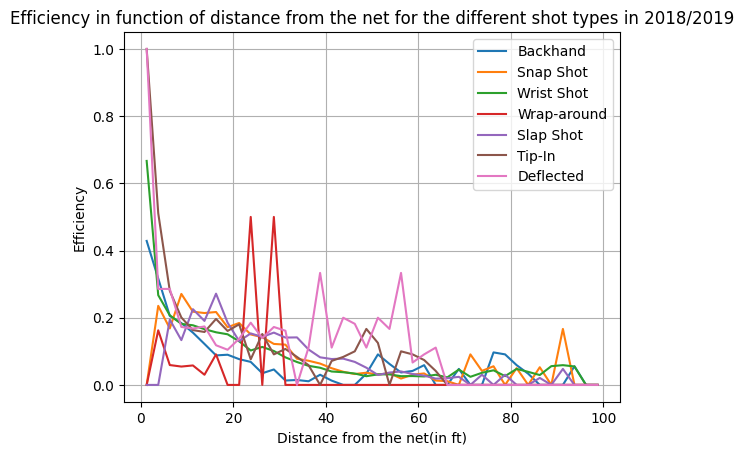

In [25]:
sv.plot_efficiency_rate_for_all_shots(df_1,bins, bin_centers, 2018)

Ce graphe est un peu plus difficile à lire étant donné qu'il y a beaucoup de courbes qui se superposent. C'est pour celà qu'on a choisi d'utiliser un outil interactif sur cette question. Cependant, il nous permet de mieux comparer les efficacités pour une range précise